# **Function 1: Harris Corner Detector**

In [8]:
import cv2
import numpy as np

filename = input("Enter the input image filename: ")

img = cv2.imread(filename)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

while True:
    try:
        blockSize = int(input("Enter the block size (odd integer): "))
        if blockSize % 2 == 0:
            raise ValueError("Block size must be an odd integer")
        break
    except ValueError as e:
        print(e)
        
while True:
    try:
        ksize = int(input("Enter the Sobel operator kernel size (odd integer between 3 and 31): "))
        if ksize % 2 == 0:
            raise ValueError("Kernel size must be an odd integer")
        if ksize < 3 or ksize > 31:
            raise ValueError("Kernel size must be between 3 and 31")
        break
    except ValueError as e:
        print(e)
        
while True:
    try:
        k = float(input("Enter the value of Harris detector free parameter k (recommended range: 0.04-0.06): "))
        break
    except ValueError as e:
        print(e)

dst = cv2.cornerHarris(gray, blockSize=blockSize, ksize=ksize, k=k)

# Threshold the resulting image to highlight the detected corners
thresh = 0.01 * dst.max()
corner_img = img.copy()
for i in range(dst.shape[0]):
    for j in range(dst.shape[1]):
        if dst[i,j] > thresh:
            cv2.circle(corner_img, (j,i), radius=2, color=(0,255,0), thickness=-1)

# Display the resulting image with highlighted corners
cv2.imshow('Harris Corner Detector', corner_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


# **Function 2: HOG**

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.feature import hog
from skimage import data, exposure, color

**Take the pic follow link**
https://drive.google.com/file/d/1HtGYjQKXZGC5V9CpzERS31Xbo-yz2eFW/view?usp=sharing

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

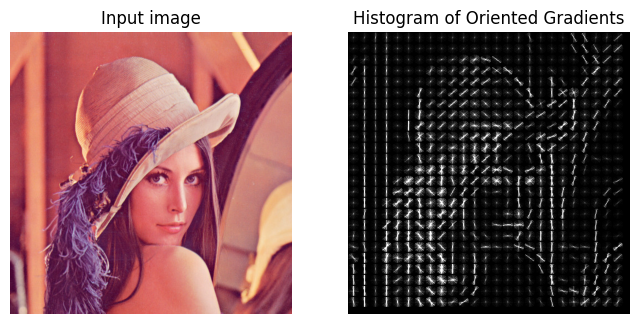

In [10]:
# Dalal and Triggs report that using either 2 x 2 or 3 x 3  cells_per_block  obtains reasonable accuracy in most cases.
file  = "lenna.jpg"
image = plt.imread(file)
gray_image = color.rgb2gray(image)

fd, hog_image = hog(gray_image, orientations=15, pixels_per_cell=(20, 20),
                    cells_per_block=(2, 2), visualize=True, block_norm="L1", transform_sqrt=False)
# display the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
# display the HOG features
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')

# **Function 3: Canny Operator for edge detection**

Text(0.5, 1.0, 'Canny Operator')

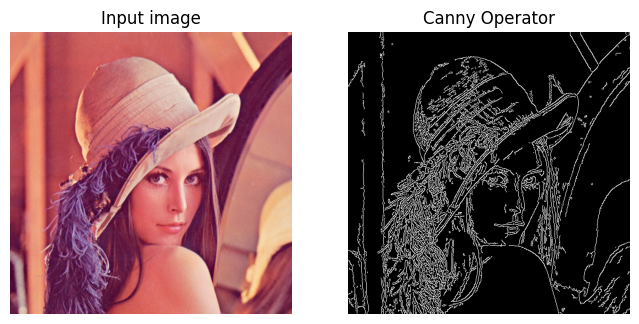

In [13]:
#import the dependencies
import cv2
import numpy as np
image_plt = plt.imread('lenna.jpg')
image = cv2.imread('lenna.jpg')
image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

canny_output = cv2.Canny(image, 50, 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image_plt, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(canny_output, cmap=plt.cm.gray)
ax2.set_title('Canny Operator')

**Compare with Sobel, Laplacian**

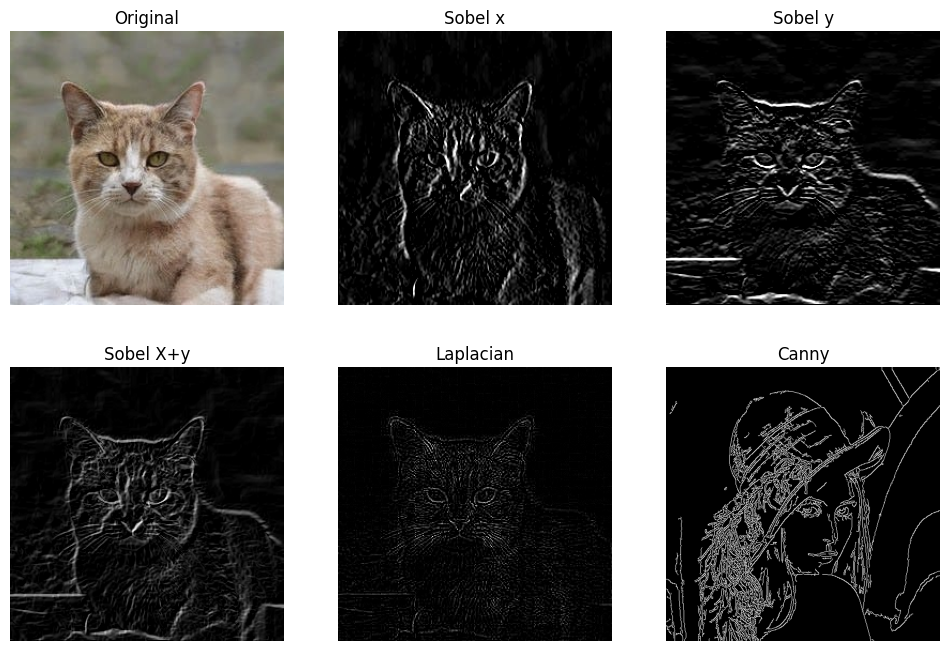

In [12]:
image = cv2.imread('cat.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, -1, 1, 0)
sobely = cv2.Sobel(gray, -1, 0, 1)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
laplacian = cv2.Laplacian(gray, -1)

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(12,8))

# Display the images in different subplots
axs[0,0].imshow(image[:,:,::-1])
axs[0,0].set_title('Original')

axs[0,1].imshow(sobelx, cmap='gray')
axs[0,1].set_title('Sobel x')

axs[0,2].imshow(sobely, cmap='gray')
axs[0,2].set_title('Sobel y')

axs[1,0].imshow(sobelxy, cmap='gray')
axs[1,0].set_title('Sobel X+y')

axs[1,1].imshow(laplacian, cmap='gray')
axs[1,1].set_title('Laplacian')

axs[1,2].imshow(canny_output, cmap='gray')
axs[1,2].set_title('Canny')

for ax in axs.flat:
    ax.axis('off')


# **Function 4: Hough Transform**

**get the picture follow link**
https://upload.wikimedia.org/wikipedia/en/d/d8/YoungModern.JPG

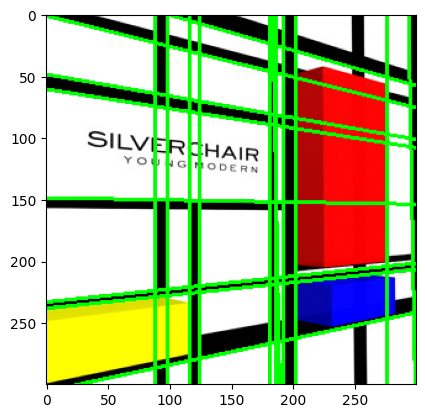

In [17]:
import cv2
import numpy as np

# Load the image and convert it to grayscale
img = cv2.imread('test.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection to the grayscale image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply the Hough transform to detect lines
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)

# Draw the detected lines on the original image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)

# Display the final image using Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

